<a href="https://colab.research.google.com/github/Junhand/ADandCD/blob/main/ADandCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter1（本書で扱うデータ）

<ipython-input-53-c560c084d74b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data.rename(columns={0: 'time', 1: 'value'}, inplace=True)


<Axes: xlabel='time'>

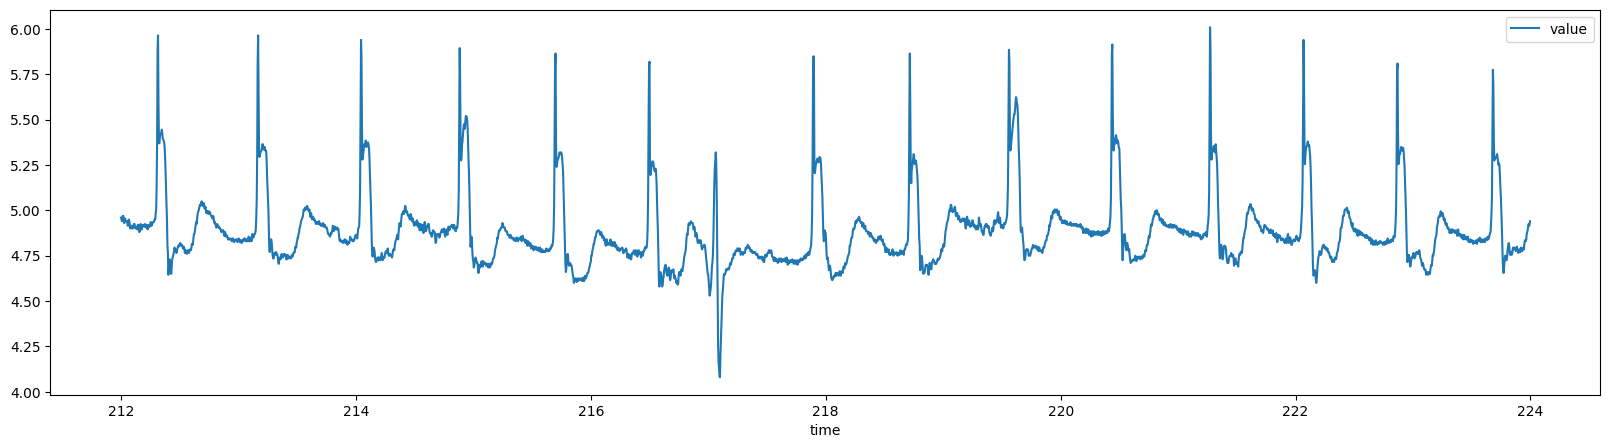

In [ ]:
import pandas as pd

url = "http://www.cs.ucr.edu/~eamonn/discords/qtdbsel102.txt"
data = pd.read_csv(url, header=None, sep="\t")
ts_data = data.iloc[:,[0,1]]
# カラム名が適当なのでリネームする
#data = data[['data_1', 'data_2', 'data_3']]
ts_data.rename(columns={0: 'time', 1: 'value'}, inplace=True)
# 年=1900年になっているので置換
ts_data = ts_data.set_index("time")
ts_data = ts_data.iloc[3000:6000,:]
ts_data.plot(figsize = (20, 5))

#ホテリングの$T^2$法の実用

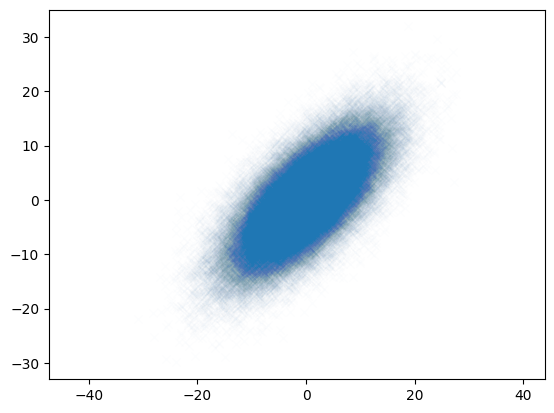

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 2次元の正規分布からデータセットを作成する
mean = np.array((0,0)) # 平均値をゼロに設定
cov = np.array([(50, 35), (35, 50)]) # 分散共分散行列を設定

# データを10万点作成する
X = np.random.multivariate_normal(mean, cov, 100000)

# データセットの分布を可視化
plt.plot(X.T[0], X.T[1], 'x', alpha=0.01)
plt.axis('equal')
plt.show()


##母集団の分布の推定

In [ ]:
# 標本の平均を計算
mu = X.mean(axis=0)

# 標本の分散共分散行列を計算
cov2 = np.cov(X.T)

print("母集団の平均")
print(mean)
print("標本平均")
print(mu)

print("\n母集団の分散共分散行列")
print(cov)
print("標本による分散共分散行列")
print(cov2)

母集団の平均
[0 0]
標本平均
[-0.04568074 -0.00788654]

母集団の分散共分散行列
[[50 35]
 [35 50]]
標本による分散共分散行列
[[50.04779438 34.95739716]
 [34.95739716 49.8868857 ]]


##異常度の計算（マハラノビス距離の使用）

In [ ]:
from scipy.spatial import distance
from scipy.stats import chi2

# 分散共分散行列の逆行列を計算
cov_i = np.linalg.pinv(cov2) #cov2は標本の分散共分散行列

# 異常度を計算したい点を設定
x = [1, 1]

# 異常度を計算 (マハラノビス距離の2乗値を計算)
anomaly_score = distance.mahalanobis(x, mu, cov_i)**2

# 異常度を表示
print("異常度 = %.2f" % anomaly_score)

# データセット (変数X) に含まれる全データについて異常度を計算
anomaly_scores = np.array([distance.mahalanobis(x, mu, cov_i)**2 for x in X])

print(X[:20,:])
print()
print(anomaly_scores[:20])

異常度 = 0.02
[[  3.88823083   5.06852485]
 [  2.32589161   5.98382125]
 [  1.78873249   4.8031108 ]
 [ -9.52658183   2.05211662]
 [  7.09524422   0.1510099 ]
 [-13.04023748 -12.50981952]
 [ -5.62464418  -0.34226215]
 [  2.84169196   3.80574499]
 [  5.88561574   3.19726577]
 [  2.94743903  -2.18969415]
 [  5.39744207  -4.00105799]
 [  2.12832926   8.2825911 ]
 [  1.44499657  -7.0889187 ]
 [ 10.85797744  -0.55034582]
 [ -1.24378098  -1.41375215]
 [  3.88107841   2.97616239]
 [ -0.19222771  -3.05602092]
 [ 10.36748959   6.53639499]
 [ -8.42922846  -3.65924296]
 [ -7.21475282   4.98356227]]

[0.52212122 0.85027446 0.55639439 4.75565339 1.93440703 3.83464652
 1.12017158 0.29334488 0.73745913 0.89568605 2.97768484 1.8949834
 2.63455417 4.98882379 0.04139374 0.31038003 0.34112964 2.18748324
 1.59512229 4.95228324]


##閾値を計算する

In [ ]:
m = 3    # 自由度 (特徴量の次元) を設定
p = 0.1  # 異常検知される確率を設定
threshold = chi2.isf(p, m)  # 異常検知の閾値を計算

print("自由度 %d で異常検知される確率を %1.2f %%に設定したければ，閾値は %1.2f" % (m, 100 * p, threshold))

自由度 3 で異常検知される確率を 10.00 %に設定したければ，閾値は 6.25


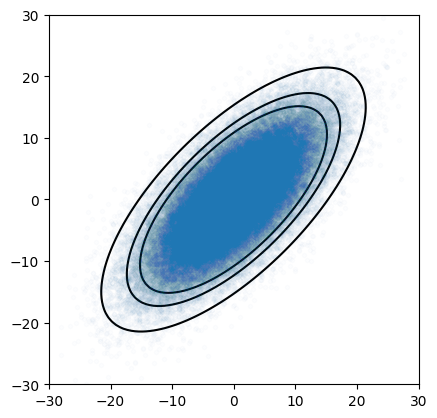

In [ ]:
# 可視化したい「異常検知される確率」の値を設定
probs = [0.1, 0.05, 0.01]

# 確率に対応する等高線の値を計算
levels = [chi2.isf(x, X.shape[-1]) for x in probs]

# 表示範囲の指定
r = 30

# z軸値(異常度)を計算
z = np.array(
    [
        [(i, j, distance.mahalanobis([i,j], mu, cov_i)**2)
         for i in np.linspace(-r, r, 100)]
         for j in np.linspace(-r, r, 100)]
)

# グラフ描画
myfig = plt.figure()
myax = myfig.add_subplot(1, 1, 1)
myax.set_aspect('equal')
plt.ylim(-r, r)
plt.xlim(-r, r)

# 等高線図を描画
cont = plt.contour(z.transpose()[0], z.transpose()[1], z.transpose()[2], levels=levels, colors=['k'])

# 散布図の描画
plt.plot(X[:,0], X[:,1], '.', alpha=0.01)
plt.show()

##異常の判定（閾値外のデータをオレンジで可視化）

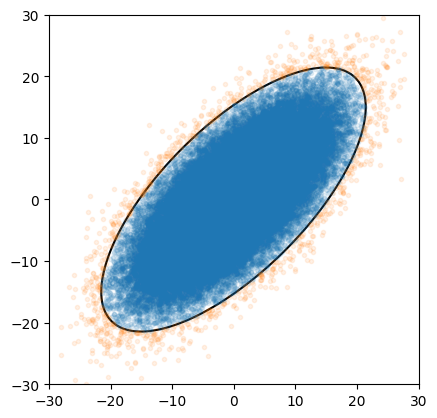

In [ ]:
# 異常検知の実施
##  異常検知される確率を1%に設定
p = 0.01

## 確率に対応する異常度の閾値を計算
threshold = chi2.isf(p, X.shape[-1])

## データセットについて異常検知を実施
anomaly_data = np.array([x for x in X if distance.mahalanobis(x, mu, cov_i)**2 > threshold])

## 可視化用に正常データのみを含むリストも作る
normal_data = np.array([x for x in X if distance.mahalanobis(x, mu, cov_i)**2 <= threshold])

# 散布図として異常検知結果を可視化する
## 表示範囲の指定
r = 30

## z軸値(異常度)を計算
z = np.array(
    [
        [(i, j, distance.mahalanobis([i,j], mu, cov_i)**2)
         for i in np.linspace(-r, r, 100)]
         for j in np.linspace(-r, r, 100)]
)

## グラフ描画
myfig = plt.figure()
myax = myfig.add_subplot(1, 1, 1)
myax.set_aspect('equal')
plt.ylim(-r, r)
plt.xlim(-r, r)

## 等高線図を描画
cont = plt.contour(z.transpose()[0], z.transpose()[1], z.transpose()[2], levels=[threshold], colors=['k'])

## 散布図の描画
plt.plot(normal_data[:,0], normal_data[:,1], '.', alpha=0.1)
plt.plot(anomaly_data[:,0], anomaly_data[:,1], '.', alpha=0.1)
plt.show()

##異常値の検算（データが正規分布に従っているため設定値と実績値がほぼ一致している）

In [ ]:
print("異常検知された標本数: %10d個" % len(anomaly_data))
print("異常検知確率 (設定値): %10.2f%%" % (p * 100))
print("異常検知確率 (実績値): %10.2f%%" % (len(anomaly_data)/len(X) * 100))

異常検知された標本数:        985個
異常検知確率 (設定値):       1.00%
異常検知確率 (実績値):       0.98%
